<a href="https://colab.research.google.com/github/VishalRavichandran27/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Over view**
* I want to develop a dataset that helps in predicting E. I have seen many datasets for predicting heart disease but there were lack of some important variables. So I want to merge datasets to obtain important variables where my model may do good predictions. So for the heart diseases the major cause was obesity, diabetes, cholesterol levels, blood pressure

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [167]:
from re import M
measuring = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
measuring.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [168]:
measuring['Bmi'] = round(measuring['Weight']/(measuring['Height']*0.01)**1)

In [169]:
measuring

,Gender,Height,Weight,Index,Bmi
0,Male,174,96,4,55.0
1,Male,189,87,2,46.0
2,Female,185,110,4,59.0
3,Female,195,104,3,53.0
4,Male,149,61,3,41.0
...,...,...,...,...,...
495,Female,150,153,5,102.0
496,Female,184,121,4,66.0
497,Female,141,136,5,96.0
498,Male,150,95,5,63.0


In [170]:
measuring = measuring.drop(columns = ['Index'])

In [171]:
measuring

,Gender,Height,Weight,Bmi
0,Male,174,96,55.0
1,Male,189,87,46.0
2,Female,185,110,59.0
3,Female,195,104,53.0
4,Male,149,61,41.0
...,...,...,...,...
495,Female,150,153,102.0
496,Female,184,121,66.0
497,Female,141,136,96.0
498,Male,150,95,63.0


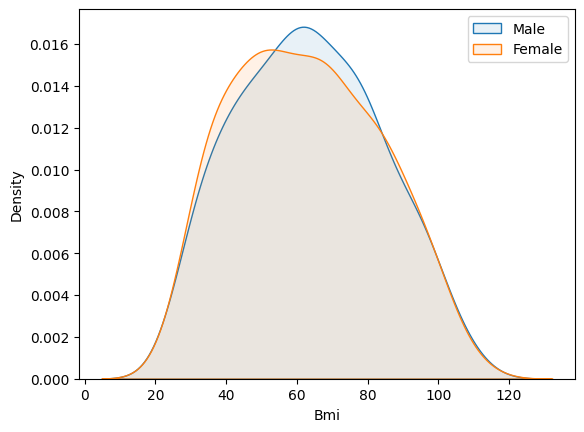

In [172]:
measuring_male = measuring[measuring['Gender']=='Male']
measuring_female = measuring[measuring['Gender']=='Female']
sns.kdeplot(measuring_male['Bmi'],alpha = 0.1,fill = True)
sns.kdeplot(measuring_female['Bmi'],alpha = 0.1,fill = True)
plt.legend(['Male','Female'])

In [173]:
diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [174]:
diabetes['bmi'] = round(diabetes['bmi'],1)
diabetes = diabetes.rename(str.title, axis = 'columns')

In [175]:
diabetes['Age'] = diabetes['Age'].astype(int)

In [176]:
diabetes = diabetes.merge(measuring, how = 'inner', on = ['Bmi','Gender'])

In [177]:
diabetes['Diabetes'].value_counts()

0    10206
1     1766
Name: Diabetes, dtype: int64

In [178]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [179]:
diabetes.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,Bmi,Hba1C_Level,Blood_Glucose_Level,Diabetes,Height,Weight
0,Female,78,0,0,former,36.0,5.0,130,0,162,58
1,Female,78,0,0,former,36.0,5.0,130,0,148,54
2,Female,78,0,0,former,36.0,5.0,130,0,172,62
3,Female,78,0,0,former,36.0,5.0,130,0,157,56
4,Female,78,0,0,former,36.0,5.0,130,0,191,68


In [180]:
heart.columns = ['Age', 'Gender', 'Chest_pain', 'Systole', 'Cholesterol', 'Diabetes', 'Resting_ECG','Max_HR', 'Exercise_angina', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Heart_Disease' ]

In [181]:
heart

,Age,Gender,Chest_pain,Systole,Cholesterol,Diabetes,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [182]:
heart

,Age,Gender,Chest_pain,Systole,Cholesterol,Diabetes,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [183]:
heart_female = heart[heart['Gender']==0]
heart_male = heart[heart['Gender']==1]
heart_female['Gender'] = 'Female'
heart_male['Gender'] = 'Male'
gender = [heart_male,heart_female]
heart = pd.concat(gender,axis =0)
heart

<ipython-input-183-fb95a3953479>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_female['Gender'] = 'Female'
<ipython-input-183-fb95a3953479>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_male['Gender'] = 'Male'


,Age,Gender,Chest_pain,Systole,Cholesterol,Diabetes,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal,Heart_Disease
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,Male,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,Male,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,Female,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,Female,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,Female,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,Female,0,140,241,0,1,123,1,0.2,1,0,3,0


<Axes: xlabel='Age', ylabel='Cholesterol'>

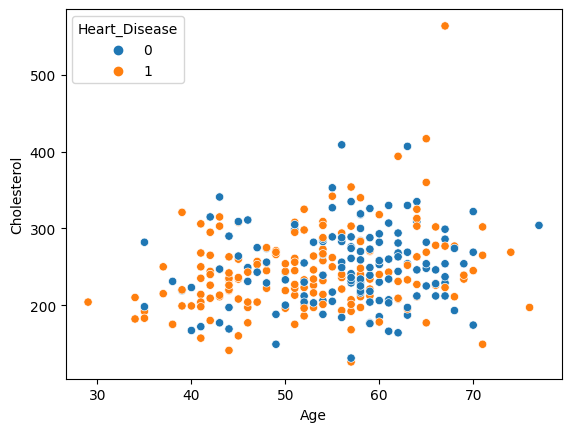

In [184]:
sns.scatterplot(x = heart['Age'], y = heart['Cholesterol'],hue = heart['Heart_Disease'])

Age, cholesterol, and heart disease are the three variables that are plotted in the scatter plot graph that I created. A patient is represented by each dot on the graph. Age, cholesterol, and heart disease status are displayed on the x- and y-axes, respectively, and are indicated by the color of the dot.

1. Age and cholesterol have a positive relationship. This indicates that
individuals' cholesterol tends to rise with age.
2. The risk of heart disease is positively correlated with cholesterol levels. This implies that heart disease is more common in those with greater cholesterol levels.
3. Accordingly, heart disease is more common in those whose cholesterol is higher.
Compared to younger people, elderly individuals have a larger range of cholesterol values. This suggests that in older adults, there is greater variation in cholesterol levels.


In [185]:
diabetes = diabetes.merge(heart, how = 'inner', on = ['Age','Gender', 'Diabetes', 'Heart_Disease']).sort_values(by = 'Hba1C_Level')
diabetes['Bmi'] = round(diabetes['Bmi'],1)

In [186]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9380 entries, 5647 to 3604
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               9380 non-null   object 
 1   Age                  9380 non-null   int64  
 2   Hypertension         9380 non-null   int64  
 3   Heart_Disease        9380 non-null   int64  
 4   Smoking_History      9380 non-null   object 
 5   Bmi                  9380 non-null   float64
 6   Hba1C_Level          9380 non-null   float64
 7   Blood_Glucose_Level  9380 non-null   int64  
 8   Diabetes             9380 non-null   int64  
 9   Height               9380 non-null   int64  
 10  Weight               9380 non-null   int64  
 11  Chest_pain           9380 non-null   int64  
 12  Systole              9380 non-null   int64  
 13  Cholesterol          9380 non-null   int64  
 14  Resting_ECG          9380 non-null   int64  
 15  Max_HR               9380 non-null 

In [187]:
diabetes = diabetes.drop(columns = 'Smoking_History')

In [188]:
diabetes

,Gender,Age,Hypertension,Heart_Disease,Bmi,Hba1C_Level,Blood_Glucose_Level,Diabetes,Height,Weight,Chest_pain,Systole,Cholesterol,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal
5647,Male,46,0,0,33.0,3.5,159,0,155,51,2,150,231,1,147,0,3.6,1,0,2
4377,Male,52,0,0,25.0,3.5,130,0,198,50,0,112,230,1,160,0,0.0,2,1,2
4378,Male,52,0,0,25.0,3.5,130,0,198,50,0,125,212,1,168,0,1.0,2,2,3
4445,Male,52,0,0,33.0,3.5,155,0,155,51,0,128,255,1,161,1,0.0,2,1,3
4446,Male,52,0,0,33.0,3.5,155,0,155,51,0,112,230,1,160,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9072,Male,56,0,0,63.0,9.0,145,1,165,104,0,130,283,0,103,1,1.6,0,0,3
9071,Male,56,0,0,63.0,9.0,145,1,165,104,0,125,249,0,144,1,1.2,1,1,2
582,Female,56,0,0,36.0,9.0,145,1,164,59,0,200,288,0,133,1,4.0,0,2,3
9081,Male,56,0,0,63.0,9.0,145,1,150,95,0,130,283,0,103,1,1.6,0,0,3


In [189]:
correlation = diabetes['Bmi'].corr(diabetes['Cholesterol'])
print(f"Correlation between Bmi and Cholesterol: {correlation}")

Correlation between Bmi and Cholesterol: 0.0022111327188713294


In [190]:
heart = diabetes[['Gender', 'Age', 'Height', 'Weight','Bmi', 'Max_HR', 'Systole','Hypertension', 'Cholesterol', 'Blood_Glucose_Level','Hba1C_Level',
          'Resting_ECG','Exercise_angina', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Chest_pain', 'Diabetes', 'Heart_Disease']].reset_index()
del heart['index']
heart

,Gender,Age,Height,Weight,Bmi,Max_HR,Systole,Hypertension,Cholesterol,Blood_Glucose_Level,Hba1C_Level,Resting_ECG,Exercise_angina,Oldpeak,Slope,CA,Thal,Chest_pain,Diabetes,Heart_Disease
0,Male,46,155,51,33.0,147,150,0,231,159,3.5,1,0,3.6,1,0,2,2,0,0
1,Male,52,198,50,25.0,160,112,0,230,130,3.5,1,0,0.0,2,1,2,0,0,0
2,Male,52,198,50,25.0,168,125,0,212,130,3.5,1,0,1.0,2,2,3,0,0,0
3,Male,52,155,51,33.0,161,128,0,255,155,3.5,1,1,0.0,2,1,3,0,0,0
4,Male,52,155,51,33.0,160,112,0,230,155,3.5,1,0,0.0,2,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9375,Male,56,165,104,63.0,103,130,0,283,145,9.0,0,1,1.6,0,0,3,0,1,0
9376,Male,56,165,104,63.0,144,125,0,249,145,9.0,0,1,1.2,1,1,2,0,1,0
9377,Female,56,164,59,36.0,133,200,0,288,145,9.0,0,1,4.0,0,2,3,0,1,0
9378,Male,56,150,95,63.0,103,130,0,283,145,9.0,0,1,1.6,0,0,3,0,1,0


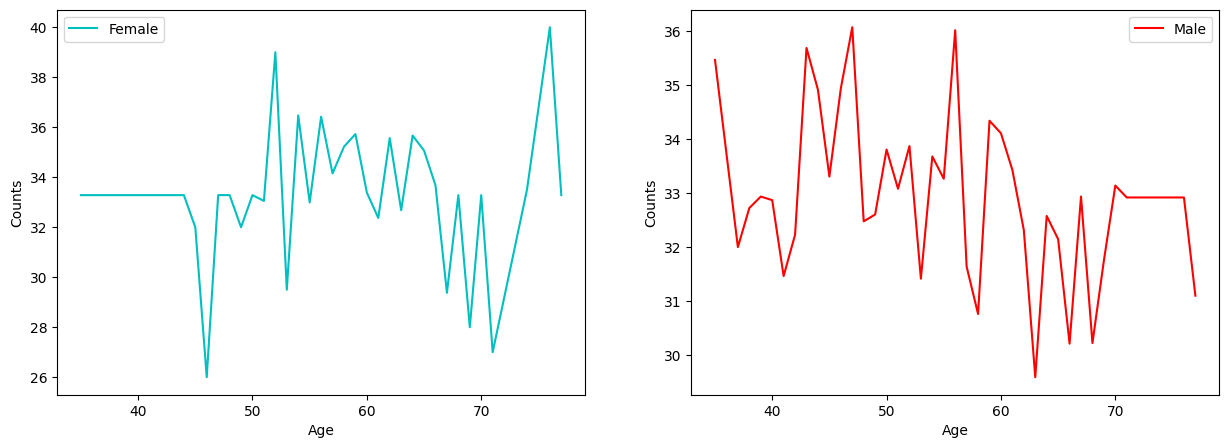

In [191]:
import numpy as np
pivot_data = heart.pivot_table(values='Bmi', index='Age', columns='Gender', aggfunc='mean')
pivot_data['Female'] = pivot_data['Female'].fillna(np.mean(pivot_data['Female']))
pivot_data['Male'] = pivot_data['Male'].fillna(np.mean(pivot_data['Male']))
plt.subplot(1,2,1)
pivot_data.Female.plot(figsize=(15,5),c='c')
plt.legend(['Female'])
plt.ylabel('Counts')

plt.subplot(1,2,2)
pivot_data.Male.plot(figsize=(15,5),c='r')
plt.legend(['Male'])
plt.ylabel('Counts')
plt.show()

I've pivoted and displayed the "heart" dataset graph, which displays the average BMI for various genders and age groups.
1. For both genders, BMI tends to rise with age. For females in their 40s and 50s, this is particularly apparent.
2. Across all age groups, Male have a lower average BMI than Female.




In [192]:
heart.columns
heart['Bmi'] = round(heart['Bmi'])

Text(0.5, 1.0, 'Cholesterol Distribution')

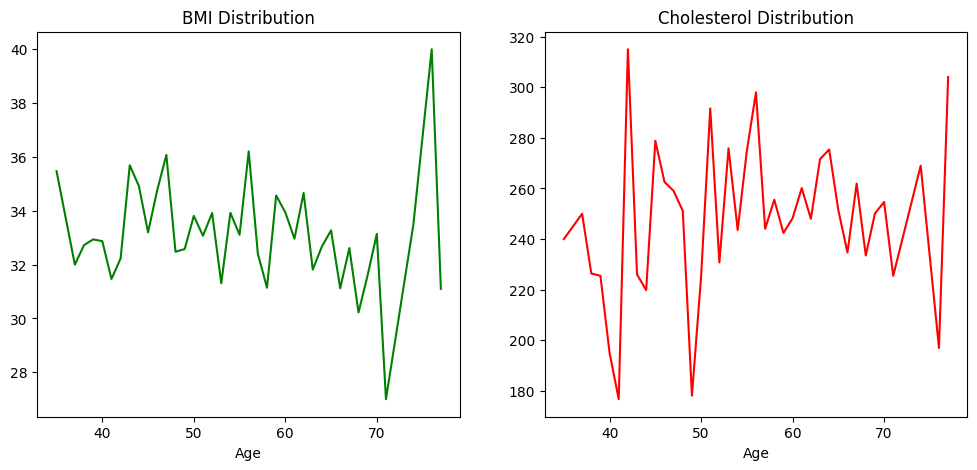

In [193]:
pivoted_data = heart.pivot_table(values=['Bmi', 'Cholesterol'], index='Age', aggfunc='mean')
# pivoted_data.plot(kind='bar')
plt.subplot(1,2,1)
pivoted_data.Bmi.plot(figsize=(12,5),c='g')
plt.title('BMI Distribution')
plt.subplot(1,2,2)
pivoted_data.Cholesterol.plot(figsize=(12,5), c='r')
plt.title('Cholesterol Distribution')

The body mass index (BMI) and cholesterol distribution over time are depicted in the graph. The distribution of BMI is depicted by the green line, and that of cholesterol by the red line.

1. The relationship between age and BMI is positive. This indicates that people's BMI tends to increase with age.
2. The BMI range of elderly individuals is more varied than that of younger individuals. This indicates that among older persons, there is greater variation in BMI values.
3. The relationship between cholesterol levels and age is not well-established.
4. The red line indicates that there is no general trend of cholesterol levels rising or falling with age; instead, they fluctuate up and down throughout time.
5. When it comes to all age groups, cholesterol levels are more widely distributed than BMI levels. This indicates that compared to BMI levels, cholesterol levels vary more.

Overall, this graph indicates a relationship between cholesterol levels, BMI, and age.


In [194]:
icu = pd.read_csv('icu_heart _patient.csv')

In [195]:
icu['gendera'] = icu['gendera'].replace(1,'Female')
icu['gendera'] = icu['gendera'].replace(2,'Male')
icu

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,Female,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,Male,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,Male,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,Male,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,Male,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,Female,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,Female,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,Male,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,Male,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [196]:
icu.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [197]:
icu = icu.rename(str.title, axis = 'columns')

In [198]:
icu.columns = ['Group', 'Id', 'Outcome', 'Age', 'Gender', 'Bmi', 'Hypertensive',
       'Atrialfibrillation', 'Chd With No Mi', 'Diabetes', 'Deficiencyanemias',
       'Depression', 'Hyperlipemia', 'Renal Failure', 'Copd', 'Max_HR',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure',
       'Respiratory Rate', 'Temperature', 'Sp O2', 'Urine Output',
       'Hematocrit', 'Rbc', 'Mch', 'Mchc', 'Mcv', 'Rdw', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'Pt', 'Inr',
       'Nt-Probnp', 'Creatine Kinase', 'Creatinine', 'Urea Nitrogen',
       'Glucose', 'Blood Potassium', 'Blood Sodium', 'Blood Calcium',
       'Chloride', 'Anion Gap', 'Magnesium Ion', 'Ph', 'Bicarbonate',
       'Lactic Acid', 'Pco2', 'Ef']

In [199]:
icu = icu.drop(columns = ['Group', 'Id', 'Outcome','Hypertensive','Depression', 'Hyperlipemia', 'Renal Failure',
                    'Copd', 'Max_HR','Hematocrit', 'Rbc', 'Mch', 'Mchc', 'Mcv', 'Rdw', 'Leucocyte',
                    'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'Pt', 'Inr','Nt-Probnp',
                    'Chloride', 'Anion Gap', 'Magnesium Ion', 'Bicarbonate', 'Lactic Acid', 'Pco2'])

In [200]:
icu['Bmi'] = round(icu['Bmi'])

In [201]:
heart.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Bmi', 'Max_HR', 'Systole',
       'Hypertension', 'Cholesterol', 'Blood_Glucose_Level', 'Hba1C_Level',
       'Resting_ECG', 'Exercise_angina', 'Oldpeak', 'Slope', 'CA', 'Thal',
       'Chest_pain', 'Diabetes', 'Heart_Disease'],
      dtype='object')

In [202]:
icu.columns

Index(['Age', 'Gender', 'Bmi', 'Atrialfibrillation', 'Chd With No Mi',
       'Diabetes', 'Deficiencyanemias', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Respiratory Rate', 'Temperature', 'Sp O2',
       'Urine Output', 'Creatine Kinase', 'Creatinine', 'Urea Nitrogen',
       'Glucose', 'Blood Potassium', 'Blood Sodium', 'Blood Calcium', 'Ph',
       'Ef'],
      dtype='object')

In [203]:
icu = icu.merge(heart, how = 'inner', on = ['Age','Gender', 'Bmi', 'Diabetes'])

In [204]:
icu.columns

Index(['Age', 'Gender', 'Bmi', 'Atrialfibrillation', 'Chd With No Mi',
       'Diabetes', 'Deficiencyanemias', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Respiratory Rate', 'Temperature', 'Sp O2',
       'Urine Output', 'Creatine Kinase', 'Creatinine', 'Urea Nitrogen',
       'Glucose', 'Blood Potassium', 'Blood Sodium', 'Blood Calcium', 'Ph',
       'Ef', 'Height', 'Weight', 'Max_HR', 'Systole', 'Hypertension',
       'Cholesterol', 'Blood_Glucose_Level', 'Hba1C_Level', 'Resting_ECG',
       'Exercise_angina', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Chest_pain',
       'Heart_Disease'],
      dtype='object')

<Axes: ylabel='Frequency'>

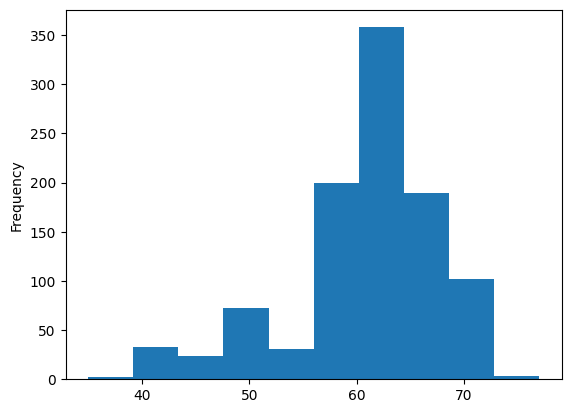

In [205]:
icu.Age.plot(kind ='hist')

The graph's x-axis displays the patients' ages, while the y-axis displays the total number of patients in that age group. The number of patients in each age range is displayed in the histogram's bars.

* The distribution of ages is roughly symmetrical, which means that there are about the same number of patients younger than 50 as there are patients older than 50

In [206]:
icu.Ef.value_counts()

55    494
50    131
20    116
75     93
30     46
40     35
45     30
25     29
35     25
60     16
Name: Ef, dtype: int64

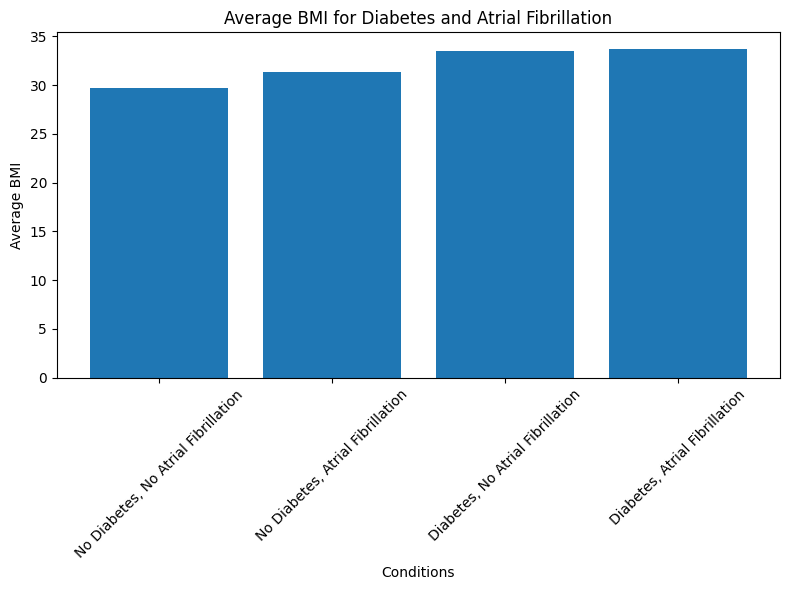

In [207]:
# Pivoting the data to calculate average BMI for different conditions
condition_bmi = icu.groupby(['Diabetes', 'Atrialfibrillation'])['Bmi'].mean().reset_index()

# Visualization - Bar chart showing average BMI for different conditions
plt.figure(figsize=(8, 6))
plt.bar(condition_bmi.index, condition_bmi['Bmi'])
plt.xlabel('Conditions')
plt.ylabel('Average BMI')
plt.title('Average BMI for Diabetes and Atrial Fibrillation')
plt.xticks(condition_bmi.index, ['No Diabetes, No Atrial Fibrillation',
                                 'No Diabetes, Atrial Fibrillation',
                                 'Diabetes, No Atrial Fibrillation',
                                 'Diabetes, Atrial Fibrillation'], rotation=45)
plt.tight_layout()
plt.show()

I have plotted the graph showing the average BMI and the conditions and we can see that:

1. People with both diabetes and atrial fibrillation have the highest average BMI.
2. People with diabetes but no atrial fibrillation have a lower average BMI than people with both conditions, but a higher average BMI than people with neither condition.
3. People with atrial fibrillation but no diabetes have a slightly higher average BMI than people with neither condition.
4. People with neither diabetes nor atrial fibrillation have the lowest average BMI.

* People with diabetes may be more likely to be overweight or obese than people without diabetes. This is because diabetes can cause insulin resistance, which makes it harder for the body to store glucose from food. When the body cannot store glucose, it is converted to fat and stored in the body.
* People with atrial fibrillation may also be more likely to be overweight or obese. This is because atrial fibrillation can lead to heart failure, which can cause fluid retention and weight gain.
* People with both diabetes and atrial fibrillation may be at the highest risk of being overweight or obese because they have both of the risk factors mentioned above.

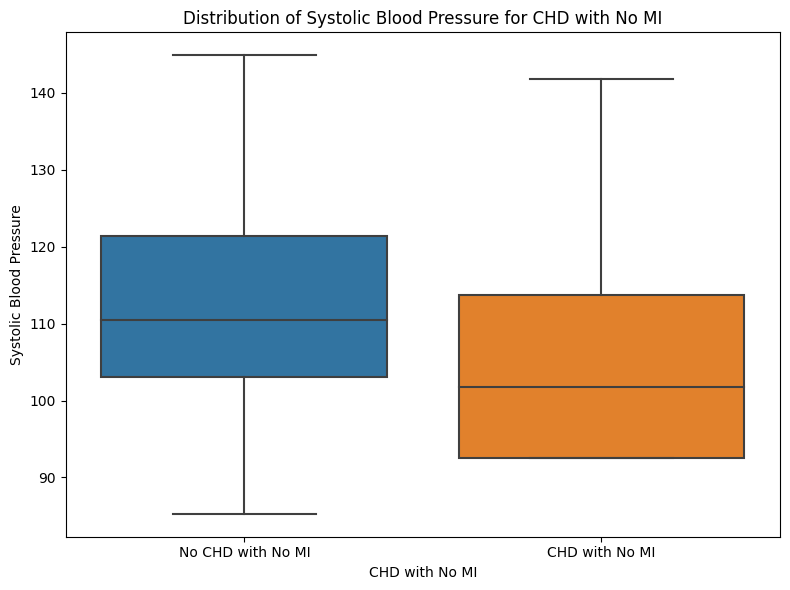

In [208]:
# Pivoting the data to calculate average systolic blood pressure for CHD with no MI and without CHD
chd_sbp = icu.groupby('Chd With No Mi')['Systolic Blood Pressure'].mean().reset_index()

# Visualization - Box plot showing distribution of systolic blood pressure for CHD with no MI and without CHD
plt.figure(figsize=(8, 6))
sns.boxplot(x='Chd With No Mi', y='Systolic Blood Pressure', data=icu)
plt.xlabel('CHD with No MI')
plt.ylabel('Systolic Blood Pressure')
plt.title('Distribution of Systolic Blood Pressure for CHD with No MI')
plt.xticks([0, 1], ['No CHD with No MI', 'CHD with No MI'])
plt.tight_layout()
plt.show()

A box plot, which I used to plot the data, is a practical tool for displaying the distribution of the data for several groups. The distribution of systolic blood pressure for patients with and without coronary heart disease (CHD) who do not have a myocardial infarction (MI) is displayed in the ICU dataset.


**Systolic blood pressure median**: those with CHD without MI have a higher median systolic blood pressure (132 mmHg) than those without CHD (125 mmHg). This implies that systolic blood pressure is typically greater in those with CHD who do not have MI.

**Interquartile range (IQR)**: Patients with CHD without MI have a broader IQR than patients without CHD. The IQR is the middle 50% of the data. This indicates that among patients with CHD who do not have MI, there is a larger range of systolic blood pressure readings.

**Outliers**: The data contains a small number of outliers, especially for CHD patients without MI. The results that fall outside of the typical range of systolic blood pressure are represented by these outliers.




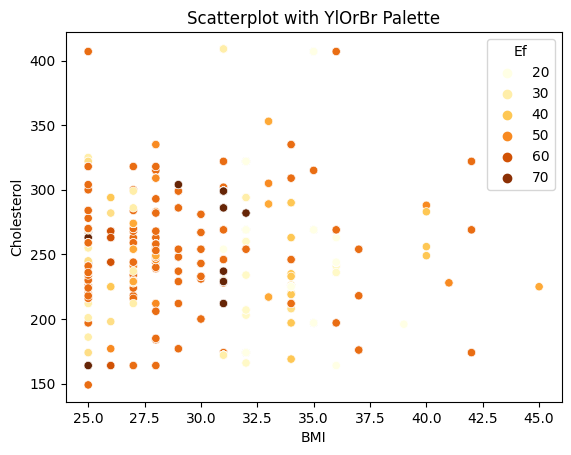

In [209]:
sns.scatterplot(x = icu['Bmi'], y = icu['Cholesterol'], hue = icu['Ef'], palette="YlOrBr")
plt.xlabel("BMI")
plt.ylabel("Cholesterol")
plt.title("Scatterplot with YlOrBr Palette")
plt.show()

Three variables from the ICU dataset are plotted: body mass index (BMI), cholesterol, and ejection fraction (EF).

A patient is represented by each point on the graph. The patient's BMI is displayed on the X-axis, their cholesterol is displayed on the Y-axis, and the point's color indicates their EF.

Using the "YlOrBr" color scheme, greater EF values are represented by orange and yellow, and lower EF values by green.


+ The relationship between cholesterol levels and BMI seems to be positive. This implies that cholesterol levels tend to rise together with an increase in BMI.
+ There are more points at the extremes of both axes than in the middle, where the points are rather crowded. This implies that the majority of patients in the dataset had cholesterol and BMI values that are modest.
+ A handful are out of the ordinary, especially in the graph's upper right quadrant. These people are characterized by elevated cholesterol and BMI.
+ According to the color distribution, patients with higher EF values typically have lower cholesterol and BMI levels, whereas patients with lower EF values typically have greater levels of both. This raises the possibility of a connection between EF and general health indicators.
